In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the cleaned data
df = pd.read_excel('C:/Users/ASUS/OneDrive/Desktop/Drug_Data_Featured.xlsx')

# Display the first 5 rows
df.head()

,Disease Category,Drug Category,Drug Name,Dosage,Retail Price,Purchase Price,Sales,Date,Month,Lag_1,Lag_2,Mean Sale,CV,Buffer Percentage,Buffer Stock
0,Cardiovascular,AMLODIP,AMLODAC 5MG,5MG,283.60,325.6,54.0,2.24,1,NaN,NaN,443.90,41.140192,30,133.0
1,Cardiovascular,AMLODIP,AMLODAC 5MG,5MG,3100.70,2701.6,307.0,2.24,1,54.0,NaN,443.90,41.140192,30,133.0
2,Cardiovascular,AMLODIP,AMLONG 10MG,10MG,59050.80,50814.4,1396.0,2.24,1,NaN,NaN,1532.40,12.067615,20,306.0
3,Cardiovascular,AMLODIP,AMLONG 2. 2. 2. 2.5MG,2.5MG,136632.10,117638.4,6127.0,2.24,1,NaN,NaN,7115.20,8.837141,20,1423.0
4,Cardiovascular,AMLODIP,AMLONG 5MG,5MG,358590.16,353840.8,16855.0,2.24,1,NaN,NaN,17535.96,2.237007,20,3382.0


In [5]:
# Check basic statistics of engineered features
print(df[['Lag_1', 'Lag_2', 'Month', 'Mean Sale']].describe())

# Check for missing values in engineered features
print(df[['Lag_1', 'Lag_2', 'Month', 'Mean Sale']].isnull().sum())

              Lag_1         Lag_2   Month     Mean Sale
count   5567.000000   5293.000000  5847.0   5847.000000
mean    1767.942500   1741.381117     1.0   1793.124089
std     3429.554286   3374.522034     0.0   2999.425384
min        3.000000      3.000000     1.0      9.000000
25%       28.000000     23.000000     1.0    245.555556
50%      193.000000    189.000000     1.0    798.981481
75%     1456.000000   1456.000000     1.0   2226.007407
max    17775.400000  17775.400000     1.0  17775.400000
Lag_1        280
Lag_2        554
Month          0
Mean Sale      0
dtype: int64


Data type of Sales: float64
Number of unique Sales values: 1294
Unique Sales values: [  54.  307. 1396. ... 5722. 6336. 5957.]


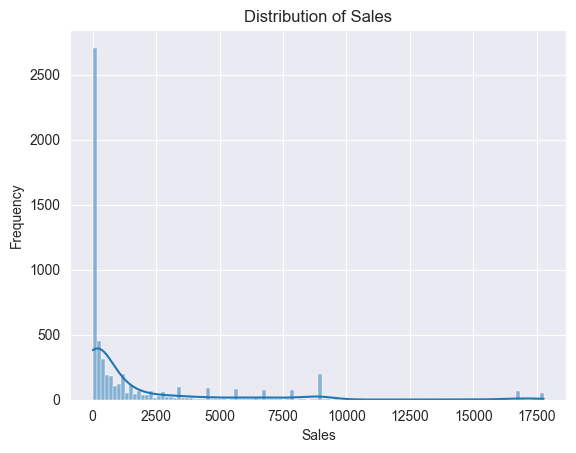

In [6]:
# Check data type
print("Data type of Sales:", df['Sales'].dtype)

# Check number of unique values
print("Number of unique Sales values:", df['Sales'].nunique())

# Check unique values
print("Unique Sales values:", df['Sales'].unique())

# Plot distribution
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Summary statistics for numerical columns
print("Summary statistics:")
print(df.describe())

# Summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
print(df.describe(include='object'))

Summary statistics:
       Retail Price  Purchase Price         Sales         Date   Month  \
count  5.847000e+03    5.847000e+03   5847.000000  5847.000000  5847.0   
mean   1.751935e+05    1.475812e+05   1793.124089     6.260797     1.0   
std    4.321854e+05    3.651946e+05   3480.137447     2.570629     0.0   
min    2.240000e+01    3.700000e+01      3.000000     2.240000     1.0   
25%    1.550400e+03    1.514000e+03     30.000000     4.240000     1.0   
50%    9.580400e+03    8.520000e+03    218.000000     6.240000     1.0   
75%    7.763335e+04    6.426175e+04   1464.000000     8.240000     1.0   
max    2.028823e+06    1.734566e+06  17775.400000    10.240000     1.0   

              Lag_1         Lag_2     Mean Sale           CV  \
count   5567.000000   5293.000000   5847.000000  5845.000000   
mean    1767.942500   1741.381117   1793.124089   125.689803   
std     3429.554286   3374.522034   2999.425384    63.143571   
min        3.000000      3.000000      9.000000     0.000

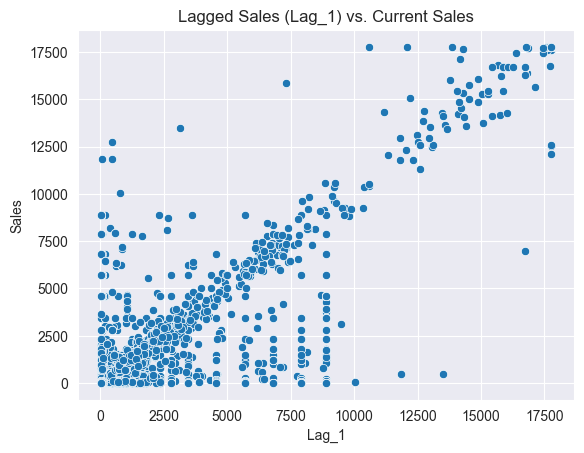

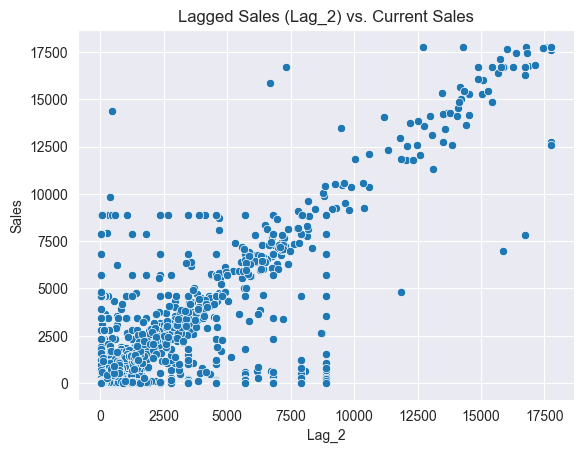

In [5]:
# Scatter plot: Lag_1 vs. Sales
sns.scatterplot(x='Lag_1', y='Sales', data=df)
plt.title('Lagged Sales (Lag_1) vs. Current Sales')
plt.show()

# Scatter plot: Lag_2 vs. Sales
sns.scatterplot(x='Lag_2', y='Sales', data=df)
plt.title('Lagged Sales (Lag_2) vs. Current Sales')
plt.show()

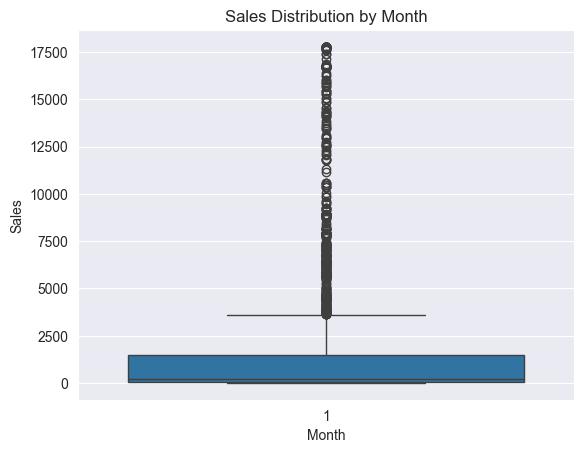

In [6]:
# Box plot: Month vs. Sales
sns.boxplot(x='Month', y='Sales', data=df)
plt.title('Sales Distribution by Month')
plt.show()

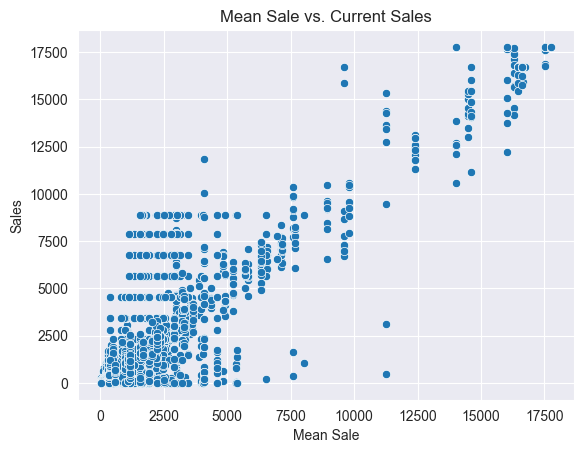

In [7]:
# Scatter plot: Mean Sale vs. Sales
sns.scatterplot(x='Mean Sale', y='Sales', data=df)
plt.title('Mean Sale vs. Current Sales')
plt.show()

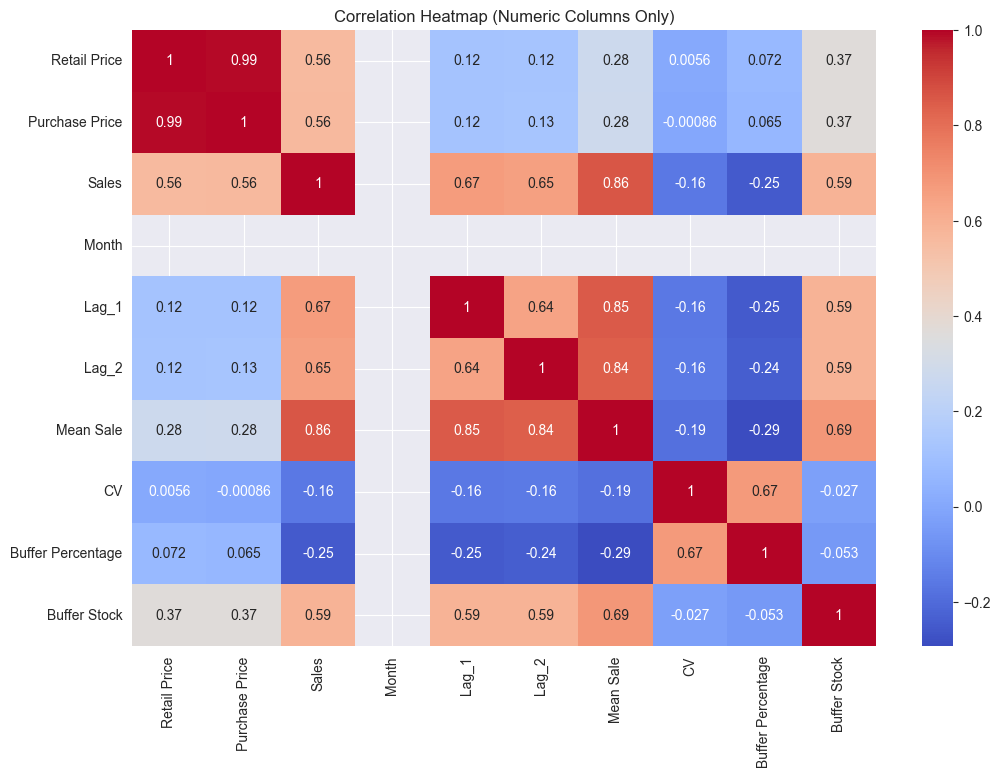

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()



In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Handle missing sales data (if any)
df['Sales'].fillna(0, inplace=True)

# Resample and plot monthly sales
df.resample('M')['Sales'].sum().plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

KeyError: 'Date'

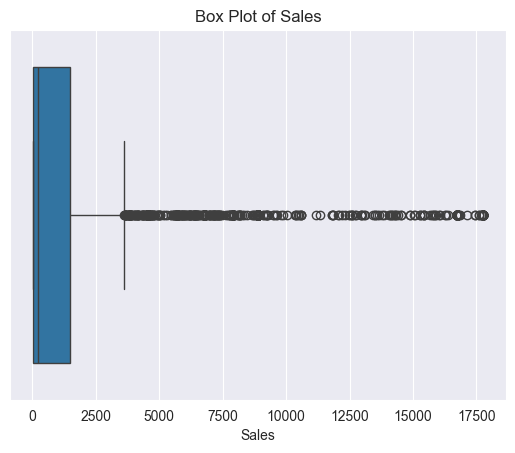

ValueError: cannot reindex on an axis with duplicate labels

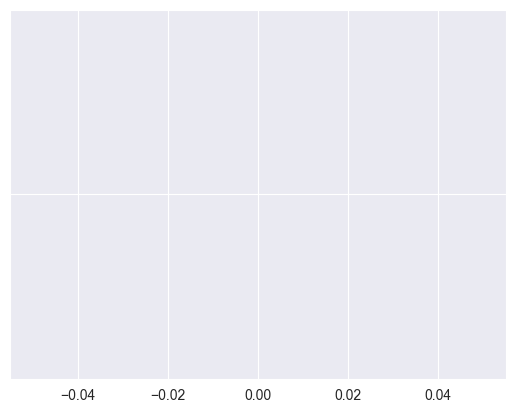

In [12]:
# Box plot for Sales
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.show()

# Box plot for Lag_1
sns.boxplot(x=df['Lag_1'])
plt.title('Box Plot of Lag_1')
plt.show()